In [1]:
#importing pandas and numpy
import pandas as pd
import numpy as np

#importing ploting library
%matplotlib inline
from matplotlib import pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns;
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings
sns.set(style="darkgrid") # adds a nice background to the graphs

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import   metrics

from scipy import stats

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
bank_df= pd.read_csv("Bank_Personal_Loan_Modelling.csv")

## checking datatypes and null values

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## checking shape

In [4]:
bank_df.shape

(5000, 14)

## checking statistical summary

In [5]:
bank_df.describe().T

count      mean      std      min       25%       50%  \
ID                 5,000.00  2,500.50 1,443.52     1.00  1,250.75  2,500.50   
Age                5,000.00     45.34    11.46    23.00     35.00     45.00   
Experience         5,000.00     20.10    11.47    -3.00     10.00     20.00   
Income             5,000.00     73.77    46.03     8.00     39.00     64.00   
ZIP Code           5,000.00 93,152.50 2,121.85 9,307.00 91,911.00 93,437.00   
Family             5,000.00      2.40     1.15     1.00      1.00      2.00   
CCAvg              5,000.00      1.94     1.75     0.00      0.70      1.50   
Education          5,000.00      1.88     0.84     1.00      1.00      2.00   
Mortgage           5,000.00     56.50   101.71     0.00      0.00      0.00   
Personal Loan      5,000.00      0.10     0.29     0.00      0.00      0.00   
Securities Account 5,000.00      0.10     0.31     0.00      0.00      0.00   
CD Account         5,000.00      0.06     0.24     0.00      0.00      0.00   
Online             5,000.00      0.60     0.49     0.00      0.00      1.00   
CreditCard         5,000.00      0.29     0.46     0.00      0.00      0.00   

                         75%       max  
ID                  3,750.25  5,000.00  
Age                    55.00     67.00  
Experience             30.00     43.00  
Income                 98.00    224.00  
ZIP Code           94,608.00 96,651.00  
Family                  3.00      4.00  
CCAvg                   2.50     10.00  
Education               3.00      3.00  
Mortgage              101.00    635.00  
Personal Loan           0.00      1.00  
Securities Account      0.00      1.00  
CD Account              0.00      1.00  
Online                  1.00      1.00  
CreditCard              1.00      1.00

In [6]:
col_lst=bank_df.columns

In [7]:
bank_df[col_lst].isnull().values.any()

False

In [8]:
bank_df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4   1.60          1         0   
1   2   45          19      34     90089       3   1.50          1         0   
2   3   39          15      11     94720       1   1.00          1         0   
3   4   35           9     100     94112       1   2.70          2         0   
4   5   35           8      45     91330       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

--> There are no null values in any columns.

--> the min value of experience is -3.There are total 52 records that have negative experience. will replace these with median value.

--> there is one zipcode value which has 4 digit =9307

In [9]:
#!pip install pandas_profiling
import pandas_profiling
bank_df.profile_report()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Incorrect Imputation And Some Observations
- As we can see the Experience is negative which is not possible as lets impute it correctly.

In [10]:
emedian=bank_df["Experience"].median()

In [11]:
bank_df["Experience"].mean()

20.1046

In [12]:
bank_df["Experience"].mode()

0    32
dtype: int64

In [13]:
exp=bank_df["Experience"].value_counts()

In [14]:
type(exp)

pandas.core.series.Series

In [15]:
exp[-1]


33

In [16]:
exp[-2]


15

In [17]:
exp[-3]

4

### 1. Treating negative experience with mode

In [18]:
bank_df['Experience'].replace( to_replace= -1,value = emedian,inplace = True )
bank_df['Experience'].replace( to_replace= -2,value = emedian,inplace = True )
bank_df['Experience'].replace( to_replace= -3,value = emedian,inplace = True )

In [19]:
bank_df.describe().T

count      mean      std      min       25%       50%  \
ID                 5,000.00  2,500.50 1,443.52     1.00  1,250.75  2,500.50   
Age                5,000.00     45.34    11.46    23.00     35.00     45.00   
Experience         5,000.00     20.33    11.25     0.00     11.00     20.00   
Income             5,000.00     73.77    46.03     8.00     39.00     64.00   
ZIP Code           5,000.00 93,152.50 2,121.85 9,307.00 91,911.00 93,437.00   
Family             5,000.00      2.40     1.15     1.00      1.00      2.00   
CCAvg              5,000.00      1.94     1.75     0.00      0.70      1.50   
Education          5,000.00      1.88     0.84     1.00      1.00      2.00   
Mortgage           5,000.00     56.50   101.71     0.00      0.00      0.00   
Personal Loan      5,000.00      0.10     0.29     0.00      0.00      0.00   
Securities Account 5,000.00      0.10     0.31     0.00      0.00      0.00   
CD Account         5,000.00      0.06     0.24     0.00      0.00      0.00   
Online             5,000.00      0.60     0.49     0.00      0.00      1.00   
CreditCard         5,000.00      0.29     0.46     0.00      0.00      0.00   

                         75%       max  
ID                  3,750.25  5,000.00  
Age                    55.00     67.00  
Experience             30.00     43.00  
Income                 98.00    224.00  
ZIP Code           94,608.00 96,651.00  
Family                  3.00      4.00  
CCAvg                   2.50     10.00  
Education               3.00      3.00  
Mortgage              101.00    635.00  
Personal Loan           0.00      1.00  
Securities Account      0.00      1.00  
CD Account              0.00      1.00  
Online                  1.00      1.00  
CreditCard              1.00      1.00

## Zipcode Handling process

https://www.unitedstateszipcodes.org/zip-code-database/ for zipcode cleansing

#### 9,307.00 is the min for the zipcode , hence treating this four digit code

In [20]:
newbank_df= bank_df
newbank_df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4   1.60          1         0   
1   2   45          19      34     90089       3   1.50          1         0   
2   3   39          15      11     94720       1   1.00          1         0   
3   4   35           9     100     94112       1   2.70          2         0   
4   5   35           8      45     91330       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [21]:
newbank_df.describe()

ID      Age  Experience   Income  ZIP Code   Family    CCAvg  \
count 5,000.00 5,000.00    5,000.00 5,000.00  5,000.00 5,000.00 5,000.00   
mean  2,500.50    45.34       20.33    73.77 93,152.50     2.40     1.94   
std   1,443.52    11.46       11.25    46.03  2,121.85     1.15     1.75   
min       1.00    23.00        0.00     8.00  9,307.00     1.00     0.00   
25%   1,250.75    35.00       11.00    39.00 91,911.00     1.00     0.70   
50%   2,500.50    45.00       20.00    64.00 93,437.00     2.00     1.50   
75%   3,750.25    55.00       30.00    98.00 94,608.00     3.00     2.50   
max   5,000.00    67.00       43.00   224.00 96,651.00     4.00    10.00   

       Education  Mortgage  Personal Loan  Securities Account  CD Account  \
count   5,000.00  5,000.00       5,000.00            5,000.00    5,000.00   
mean        1.88     56.50           0.10                0.10        0.06   
std         0.84    101.71           0.29                0.31        0.24   
min         1.00      0.00           0.00                0.00        0.00   
25%         1.00      0.00           0.00                0.00        0.00   
50%         2.00      0.00           0.00                0.00        0.00   
75%         3.00    101.00           0.00                0.00        0.00   
max         3.00    635.00           1.00                1.00        1.00   

        Online  CreditCard  
count 5,000.00    5,000.00  
mean      0.60        0.29  
std       0.49        0.46  
min       0.00        0.00  
25%       0.00        0.00  
50%       1.00        0.00  
75%       1.00        1.00  
max       1.00        1.00

In [22]:
newbank_df.drop(columns=["ID"],axis=1,inplace=True)


In [23]:
#Converted the zipcode to string and droopped the id column
newbank_df['ZIP Code'] = newbank_df['ZIP Code'].astype('str')

In [24]:
newbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [25]:
zip_df=pd.read_csv('zip_state_worldregion.csv', dtype = str)

In [26]:
zip_df.head(2)

zip state  world_region country
0  00501    NY  NorthAmerica      US
1  00544    NY  NorthAmerica      US

In [27]:
zip_df.loc[zip_df["zip"]=="93070"]

Empty DataFrame
Columns: [zip, state, world_region, country]
Index: []

In [28]:
zip_df.loc[zip_df["zip"]=="09307"]

zip state world_region country
3362  09307    AE           ME      BH

In [29]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42632 entries, 0 to 42631
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   zip           42632 non-null  object
 1   state         42632 non-null  object
 2   world_region  42632 non-null  object
 3   country       42632 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


## Treated 4 digit zipcode with zero in the end

In [30]:
newbank_df.rename(columns={"ZIP Code": "zip"},inplace=True)

In [31]:
newbank_df.loc[newbank_df['zip']=='9307']

Age  Experience  Income   zip  Family  CCAvg  Education  Mortgage  \
384   51          25      21  9307       4   0.60          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [32]:
newbank_df['zip'].replace({"9307":"93070"},inplace=True)

In [33]:
newbank_df.loc[newbank_df['zip']=='9307']

Empty DataFrame
Columns: [Age, Experience, Income, zip, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [34]:
newbank_df.loc[newbank_df['zip']=='93070']

Age  Experience  Income    zip  Family  CCAvg  Education  Mortgage  \
384   51          25      21  93070       4   0.60          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [35]:
region_df = pd.merge(newbank_df, zip_df, how='left', on = 'zip')


In [36]:
region_df.isnull().sum()

Age                    0
Experience             0
Income                 0
zip                    0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
state                 34
world_region          34
country               34
dtype: int64

In [37]:
region_df.shape

(5000, 16)

In [38]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   zip                 5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  state               4966 non-null   object 
 14  world_region        4966 non-null   object 
 15  country             4966 non-null   object 
dtypes: flo

In [39]:
region_df.loc[region_df['zip']=='93070']

Age  Experience  Income    zip  Family  CCAvg  Education  Mortgage  \
384   51          25      21  93070       4   0.60          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard state  \
384              0                   0           0       1           1   NaN   

    world_region country  
384          NaN     NaN

In [40]:
us_df=region_df[region_df.country =="US"]

In [41]:
us_df.state.value_counts()

CA    4966
Name: state, dtype: int64

In [42]:
us_df["Personal Loan"].value_counts()

0    4489
1     477
Name: Personal Loan, dtype: int64

In [43]:
#non_us_uae_df=region_df[(region_df["country"]!="US") & (region_df["country"]!="BH")]
non_us_df =region_df[(region_df["country"]!="US") ]

In [44]:
non_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 106 to 4392
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 34 non-null     int64  
 1   Experience          34 non-null     int64  
 2   Income              34 non-null     int64  
 3   zip                 34 non-null     object 
 4   Family              34 non-null     int64  
 5   CCAvg               34 non-null     float64
 6   Education           34 non-null     int64  
 7   Mortgage            34 non-null     int64  
 8   Personal Loan       34 non-null     int64  
 9   Securities Account  34 non-null     int64  
 10  CD Account          34 non-null     int64  
 11  Online              34 non-null     int64  
 12  CreditCard          34 non-null     int64  
 13  state               0 non-null      object 
 14  world_region        0 non-null      object 
 15  country             0 non-null      object 
dtypes: flo

In [45]:
non_us_df.describe().T

count  mean   std   min   25%   50%   75%    max
Age                 34.00 43.09 11.47 24.00 33.25 42.50 51.00  65.00
Experience          34.00 18.53 10.88  0.00 10.25 18.00 25.75  40.00
Income              34.00 65.94 44.74  9.00 31.75 53.00 99.25 171.00
Family              34.00  2.29  1.17  1.00  1.00  2.00  3.00   4.00
CCAvg               34.00  2.07  2.26  0.10  0.53  1.30  2.55   7.80
Education           34.00  1.97  0.80  1.00  1.00  2.00  3.00   3.00
Mortgage            34.00 31.68 73.33  0.00  0.00  0.00  0.00 301.00
Personal Loan       34.00  0.09  0.29  0.00  0.00  0.00  0.00   1.00
Securities Account  34.00  0.15  0.36  0.00  0.00  0.00  0.00   1.00
CD Account          34.00  0.00  0.00  0.00  0.00  0.00  0.00   0.00
Online              34.00  0.59  0.50  0.00  0.00  1.00  1.00   1.00
CreditCard          34.00  0.35  0.49  0.00  0.00  0.00  1.00   1.00

In [46]:
non_us_df[non_us_df["Personal Loan"]==1]

Age  Experience  Income    zip  Family  CCAvg  Education  Mortgage  \
321    44          20     101  92717       3   4.40          2        82   
1752   33           8     155  92717       1   7.40          3         0   
2428   39          12     108  92717       4   3.67          2       301   

      Personal Loan  Securities Account  CD Account  Online  CreditCard state  \
321               1                   0           0       0           0   NaN   
1752              1                   0           0       0           0   NaN   
2428              1                   0           0       0           1   NaN   

     world_region country  
321           NaN     NaN  
1752          NaN     NaN  
2428          NaN     NaN

In [47]:
non_us_df["Personal Loan"].value_counts()

0    31
1     3
Name: Personal Loan, dtype: int64

In [48]:
non_us_df.shape

(34, 16)

In [49]:
non_us_df.zip.value_counts()

92717    22
96651     6
92634     5
93070     1
Name: zip, dtype: int64

In [50]:
region_df.country.value_counts()

US    4966
Name: country, dtype: int64

- (1).After treating four digit zipcode 9307 with 93070 , that is not the correct country code and the customer for that zip has not taken personal loan.
- (2).There are 3 customer from 92717 zipcode has taken the loan with TheraBank
- (3).The zipcode 92717, 96651 and 92634 are not able to mapped to any country and world region. There are total 34 customers dosent have valid region, state or country code. i.e. zip code provided might not be correct.
- (4).There are total 4966 customers of theabank are from the California, USA, outof which 477 has taken the personal loan with the bank

In [51]:
## Binning the state into different region within usa and the NaN states for which the country hasnt been identified

In [52]:
#binning categorical variable such as state https://stackoverflow.com/questions/59004206/is-there-a-way-to-bin-categorical-data-in-pandas

def label_states (row):
    if row['country'] =="US":
        if row['state'] in ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ']:
            return 'north-east'
        if row['state'] in ['WI', 'MI', 'IL', 'IN', 'OH', 'ND', 'SD', 'NE', 'KS', 'MN', 'IO', 'MO']:
            return 'midwest'
        if row['state'] in ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'MS', 'AL', 'OK', 'TX', 'AR', 'LA']:
            return 'south'
        if row['state'] in ['AZ', 'CO','ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']:
            return 'west'    
   
    

In [53]:
region_df['region']= region_df.apply(lambda row: label_states(row), axis=1)

In [54]:
region_df.head(5)

Age  Experience  Income    zip  Family  CCAvg  Education  Mortgage  \
0   25           1      49  91107       4   1.60          1         0   
1   45          19      34  90089       3   1.50          1         0   
2   39          15      11  94720       1   1.00          1         0   
3   35           9     100  94112       1   2.70          2         0   
4   35           8      45  91330       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard state  \
0              0                   1           0       0           0    CA   
1              0                   1           0       0           0    CA   
2              0                   0           0       0           0    CA   
3              0                   0           0       0           0    CA   
4              0                   0           0       0           1    CA   

   world_region country region  
0  NorthAmerica      US   west  
1  NorthAmerica      US   west  
2  NorthAmerica      US   west  
3  NorthAmerica      US   west  
4  NorthAmerica      US   west

#### As we know there are 34 data points for which zipcode is not mapped to country,state, world_region, hence they have null values, lets mark their state,country,world_region,region to unknown

In [55]:
region_df.fillna("unKnown",inplace=True)

In [56]:
region_df[region_df.country!="US"].head(5)

Age  Experience  Income    zip  Family  CCAvg  Education  Mortgage  \
106   43          17      69  92717       4   2.90          1         0   
172   38          13     171  92717       2   7.80          1         0   
184   52          26      63  92717       2   1.50          2         0   
321   44          20     101  92717       3   4.40          2        82   
366   50          24      35  92717       1   0.30          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  \
106              0                   0           0       1           1   
172              0                   0           0       1           0   
184              0                   1           0       1           0   
321              1                   0           0       0           0   
366              0                   0           0       1           0   

       state world_region  country   region  
106  unKnown      unKnown  unKnown  unKnown  
172  unKnown      unKnown  unKnown  unKnown  
184  unKnown      unKnown  unKnown  unKnown  
321  unKnown      unKnown  unKnown  unKnown  
366  unKnown      unKnown  unKnown  unKnown

In [57]:
region_df.drop(['zip','state','world_region','country'], axis = 1,inplace=True) 

In [58]:
region_df.shape

(5000, 13)

In [59]:
region_df.isnull().count()

Age                   5000
Experience            5000
Income                5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
region                5000
dtype: int64

# Number of Unique items in each columns

In [60]:
reg_col_lst=region_df.columns

In [61]:
region_df.head(2)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4   1.60          1         0              0   
1   45          19      34       3   1.50          1         0              0   

   Securities Account  CD Account  Online  CreditCard region  
0                   1           0       0           0   west  
1                   1           0       0           0   west

In [62]:
region_df[reg_col_lst].nunique()

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
region                  2
dtype: int64

- There are 45 unique ages, 
- 44 unique Experience , 
- 162 unique Income,
- 3 unique Education ,
- 347 unique Martage
- 2 of each different counts for categorical columns Personal Loan, Securities Account, CD Account, Onlin and Credicard.


## Number of people with zero mortgage?

In [63]:
region_df.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [64]:
region_df[region_df["Mortgage"]==0].count()

Age                   3462
Experience            3462
Income                3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
region                3462
dtype: int64

total 3462 are with zero mortgage from 5000 dataset

## Number of people with zero credit card spending per month?

In [65]:
region_df[region_df["CCAvg"]==0.0]

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
63     42          17      32       4   0.00          2         0   
128    38          14      74       2   0.00          1         0   
198    27           3      59       4   0.00          1        90   
210    51          26      20       2   0.00          1         0   
215    38          14      92       2   0.00          1       249   
...   ...         ...     ...     ...    ...        ...       ...   
4801   34          10      88       2   0.00          1       121   
4826   56          31      81       2   0.00          3       225   
4837   36          10     183       2   0.00          1         0   
4910   48          22     120       1   0.00          1         0   
4949   29           5      64       4   0.00          1       249   

      Personal Loan  Securities Account  CD Account  Online  CreditCard region  
63                0                   0           0       1           0   west  
128               0                   1           0       1           0   west  
198               0                   1           0       1           0   west  
210               0                   0           0       0           0   west  
215               0                   0           0       1           1   west  
...             ...                 ...         ...     ...         ...    ...  
4801              0                   0           0       1           0   west  
4826              0                   0           0       0           0   west  
4837              0                   0           0       0           0   west  
4910              0                   0           0       1           0   west  
4949              0                   0           0       0           1   west  

[106 rows x 13 columns]

In [66]:
region_df[region_df["CCAvg"]==0.0].count()

Age                   106
Experience            106
Income                106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
region                106
dtype: int64

total 106 people are with zero credit card spending per month.

### Value counts of all categorical columns.

In [67]:
## Personal Loan

region_df[["Personal Loan","Securities Account","CD Account","Online","CreditCard"]].apply(pd.Series.value_counts)

Personal Loan  Securities Account  CD Account  Online  CreditCard
0           4520                4478        4698    2016        3530
1            480                 522         302    2984        1470

### Value counts for Education

In [68]:
region_df["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

### Value counts for Family

In [69]:
region_df["Family"].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

 - There are 2096 people have undergraduate,1403 are Graduate , and 1501 are Professional/Advanced level Education

### Univariate Analysis

In [70]:
region_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'region'],
      dtype='object')

In [71]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  region              5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 546.9+ KB


In [72]:
region_df.describe().T

count  mean    std   min   25%   50%    75%    max
Age                5,000.00 45.34  11.46 23.00 35.00 45.00  55.00  67.00
Experience         5,000.00 20.33  11.25  0.00 11.00 20.00  30.00  43.00
Income             5,000.00 73.77  46.03  8.00 39.00 64.00  98.00 224.00
Family             5,000.00  2.40   1.15  1.00  1.00  2.00   3.00   4.00
CCAvg              5,000.00  1.94   1.75  0.00  0.70  1.50   2.50  10.00
Education          5,000.00  1.88   0.84  1.00  1.00  2.00   3.00   3.00
Mortgage           5,000.00 56.50 101.71  0.00  0.00  0.00 101.00 635.00
Personal Loan      5,000.00  0.10   0.29  0.00  0.00  0.00   0.00   1.00
Securities Account 5,000.00  0.10   0.31  0.00  0.00  0.00   0.00   1.00
CD Account         5,000.00  0.06   0.24  0.00  0.00  0.00   0.00   1.00
Online             5,000.00  0.60   0.49  0.00  0.00  1.00   1.00   1.00
CreditCard         5,000.00  0.29   0.46  0.00  0.00  0.00   1.00   1.00

- 1. Age Distplot
- 2. Experience Distplot
- 3. Income distplot
- 4. Family distplot
- 5. CCAvg distplot
- 6. Mortgage

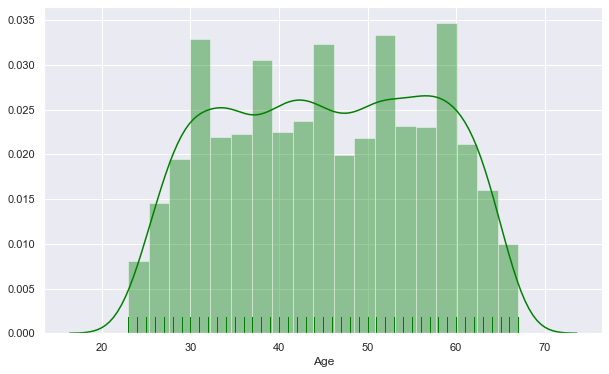

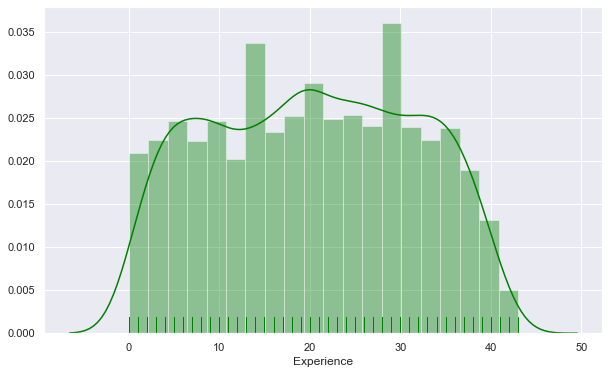

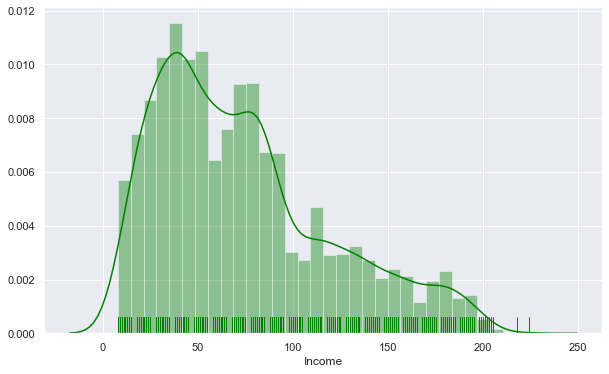

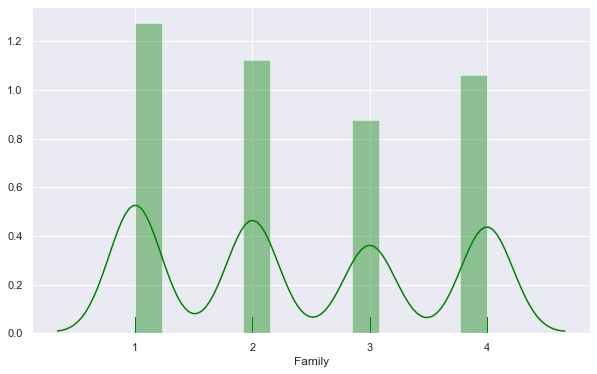

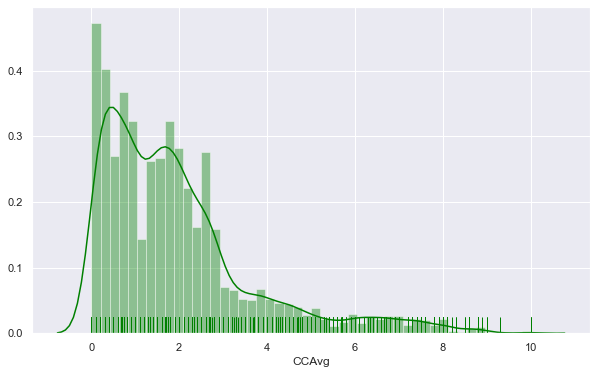

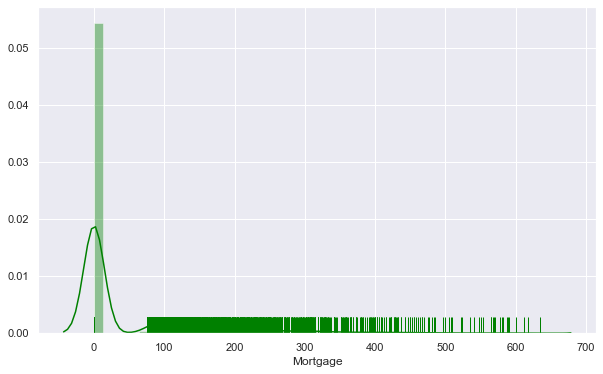

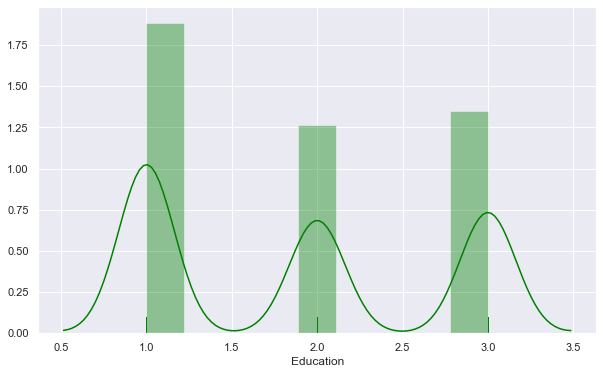

In [73]:
for i in ['Age','Experience','Income','Family','CCAvg','Mortgage','Education']:
    sns.set({'figure.figsize': (10,6)})
    sns.distplot(region_df[i],color="green",rug=True)
    plt.show()

- 1. Age Box Plot
- 2. Experience boxplot
- 3. Income boxplot
- 4. CCAvg boxplot
- 5. Family BoxPlot
- 6. Mortgage

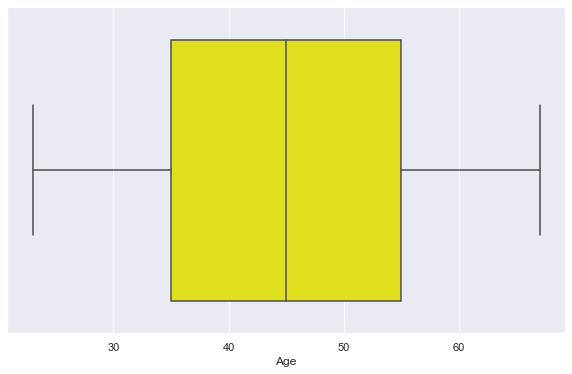

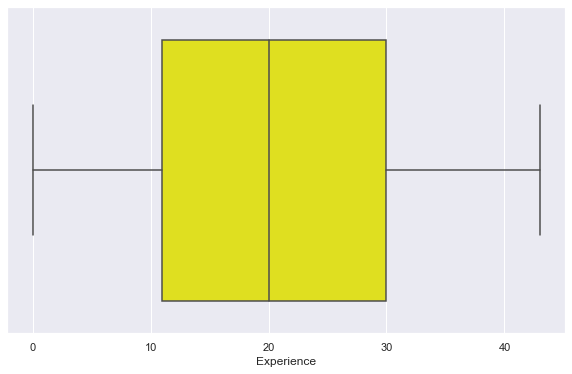

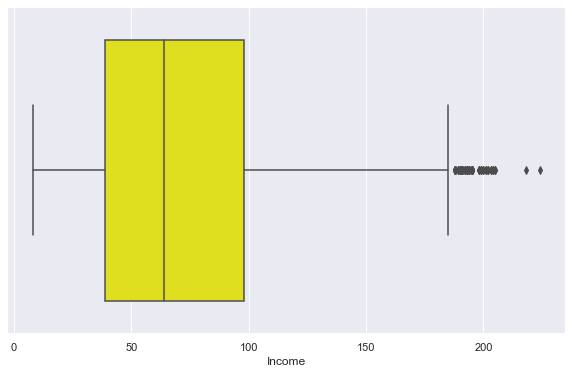

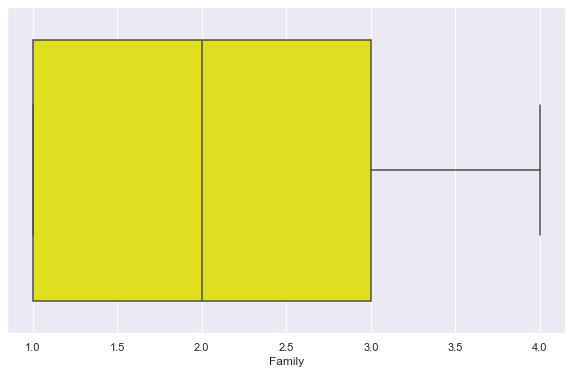

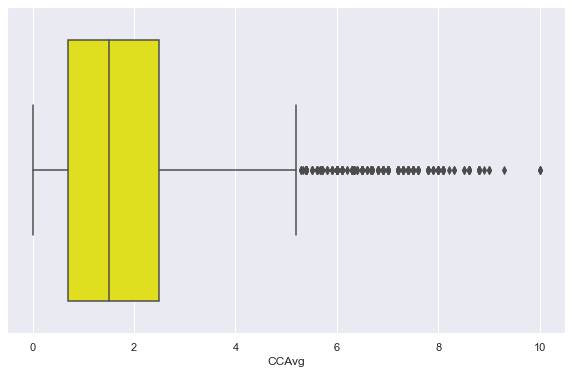

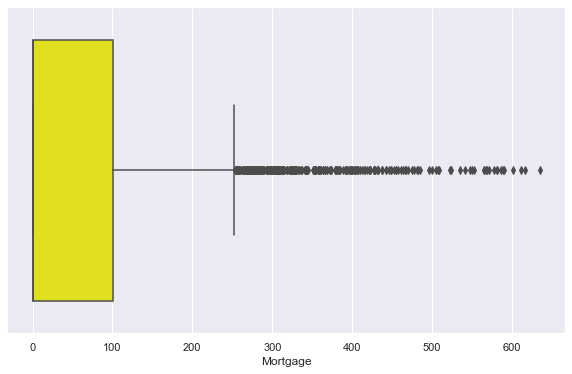

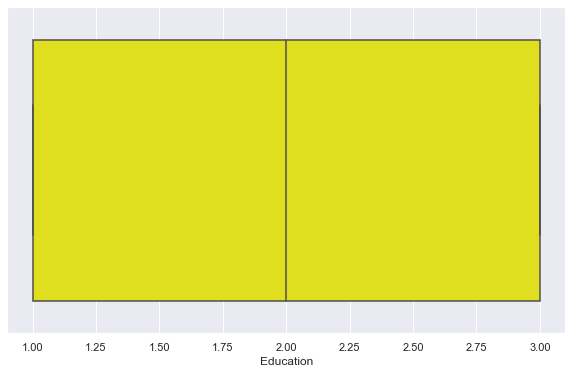

In [74]:
for i in ['Age','Experience','Income','Family','CCAvg','Mortgage','Education']:
    sns.set({'figure.figsize': (10,6)})
    sns.boxplot(region_df[i],color='yellow')
    plt.show()

#### Printing outliers for lower and higher end.

In [75]:
Q1 = region_df.quantile(0.25)
Q3 = region_df.quantile(0.75)
IQR = Q3 - Q1


IQR_15=IQR * 1.5

outliers_q3= Q3+IQR_15


In [76]:
print(outliers_q3)

Age                   85.00
Experience            58.50
Income               186.50
Family                 6.00
CCAvg                  5.20
Education              6.00
Mortgage             252.50
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
Online                 2.50
CreditCard             2.50
dtype: float64


In [77]:
print(Q1-IQR_15)

Age                     5.00
Experience            -17.50
Income                -49.50
Family                 -2.00
CCAvg                  -2.00
Education              -2.00
Mortgage             -151.50
Personal Loan           0.00
Securities Account      0.00
CD Account              0.00
Online                 -1.50
CreditCard             -1.50
dtype: float64


In [78]:
region_df.Family.value_counts(normalize=True)

1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64

In [79]:
region_df.Education.value_counts(normalize=True)

1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64

In [80]:
region_df.loc[region_df["Age"]>85].count()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
region                0
dtype: int64

In [81]:
region_df.loc[region_df["Income"]>186.5].count()

Age                   96
Experience            96
Income                96
Family                96
CCAvg                 96
Education             96
Mortgage              96
Personal Loan         96
Securities Account    96
CD Account            96
Online                96
CreditCard            96
region                96
dtype: int64

In [82]:
region_df[region_df["CCAvg"]>5.2].count()

Age                   324
Experience            324
Income                324
Family                324
CCAvg                 324
Education             324
Mortgage              324
Personal Loan         324
Securities Account    324
CD Account            324
Online                324
CreditCard            324
region                324
dtype: int64

In [83]:
region_df[region_df["Mortgage"]>252.5].count()

Age                   291
Experience            291
Income                291
Family                291
CCAvg                 291
Education             291
Mortgage              291
Personal Loan         291
Securities Account    291
CD Account            291
Online                291
CreditCard            291
region                291
dtype: int64

### Some observations
- Note for Age:- Age data are  equally distributed its mean is closely matching to median.
- Note for Income:- There are 96 people in the dataset who has income more than 186.5K.The mean is greater than median hence there is positive skewness of data
- Note for CCAvg:- There are 324 people in the dataset who spends around more than 5000 on credicard, hence it is showing that as outliers. There is positive skewness in the data
- Note on Mortgage: There are around 291 people who has mortgage greater than 252K.

In [84]:
for i in list(region_df.columns[region_df.dtypes=='object']):   # checking value counts of all object type columns
    print(region_df[i].value_counts(normalize=True))
    print()

west      0.99
unKnown   0.01
Name: region, dtype: float64



In [85]:
region_df=region_df[region_df["region"]!="unKnown"]

In [86]:
region_df.shape

(4966, 13)

In [87]:
region_df.region.nunique()

1

### Conclusion on dropping newly created binned column 'region'
- As we can see that unKnown region adds less than 0.01 values to this dataset hence dropping them will not be any issue in the dataset. With this specific argument we can drop the region 
- Once you drop unknonw values from region only value present in region is "west" which belongs to US. so it is safe to assume that this entire dataset belongs to USA hence we can drop the region column as well

In [88]:
## Dropping region column per above conclusion
region_df.drop(columns=["region"],inplace=True)

In [89]:
region_df.shape

(4966, 12)

In [90]:
region_df.describe().T

count  mean    std   min   25%   50%    75%    max
Age                4,966.00 45.35  11.46 23.00 35.00 45.00  55.00  67.00
Experience         4,966.00 20.34  11.26  0.00 11.00 20.00  30.00  43.00
Income             4,966.00 73.83  46.04  8.00 39.00 64.00  98.00 224.00
Family             4,966.00  2.40   1.15  1.00  1.00  2.00   3.00   4.00
CCAvg              4,966.00  1.94   1.74  0.00  0.70  1.50   2.50  10.00
Education          4,966.00  1.88   0.84  1.00  1.00  2.00   3.00   3.00
Mortgage           4,966.00 56.67 101.87  0.00  0.00  0.00 101.00 635.00
Personal Loan      4,966.00  0.10   0.29  0.00  0.00  0.00   0.00   1.00
Securities Account 4,966.00  0.10   0.31  0.00  0.00  0.00   0.00   1.00
CD Account         4,966.00  0.06   0.24  0.00  0.00  0.00   0.00   1.00
Online             4,966.00  0.60   0.49  0.00  0.00  1.00   1.00   1.00
CreditCard         4,966.00  0.29   0.46  0.00  0.00  0.00   1.00   1.00

### 7. Observation on Target Variable Personal Loan

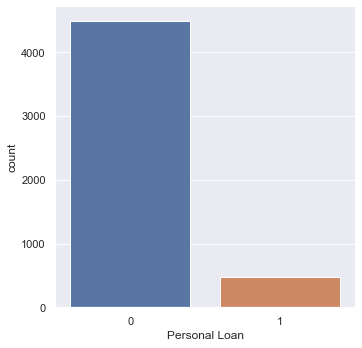

In [91]:
sns.set({'figure.figsize': (10,5)})
sns.catplot(x="Personal Loan", kind="count",data=region_df);

In [92]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = region_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0   0.90
1   0.10
Name: Personal Loan, dtype: float64


In [93]:
df=region_df.loc[region_df["Personal Loan"]==1]

In [94]:
df.shape

(477, 12)

In [95]:
df.describe().T

count   mean    std   min    25%    50%    75%    max
Age                477.00  45.11  11.61 26.00  35.00  45.00  55.00  65.00
Experience         477.00  19.88  11.60  0.00   9.00  20.00  30.00  41.00
Income             477.00 144.89  31.57 60.00 122.00 143.00 172.00 203.00
Family             477.00   2.61   1.11  1.00   2.00   3.00   4.00   4.00
CCAvg              477.00   3.90   2.10  0.00   2.60   3.80   5.33  10.00
Education          477.00   2.23   0.75  1.00   2.00   2.00   3.00   3.00
Mortgage           477.00 100.68 161.02  0.00   0.00   0.00 192.00 617.00
Personal Loan      477.00   1.00   0.00  1.00   1.00   1.00   1.00   1.00
Securities Account 477.00   0.13   0.33  0.00   0.00   0.00   0.00   1.00
CD Account         477.00   0.29   0.46  0.00   0.00   0.00   1.00   1.00
Online             477.00   0.61   0.49  0.00   0.00   1.00   1.00   1.00
CreditCard         477.00   0.30   0.46  0.00   0.00   0.00   1.00   1.00

### Remember: 
- At this point we dropped ID ,ZIPCode and newly binned column off of ZIP Code which was region. We also treated negative experience with its median.
- The Age, Experience, CCAvg,Income, Mortgage are remaining numeric/int variables
- The Personal Loan, Securities Account, CD Account, Online, CreditCard are categorical/boolean variables
- Family and Education can be converted to categorical variable

** Observation on Target Variable **
- there is a heavy amount of imbalance in data , 90% customer never had any loan.
- There are 477 people who has personal loans offered from Therabank(these all customers belong to California state,USA).

### Categorical/boolean Variables  Analysis

In [96]:
#Convert X & Y variable to a categorical variable wherever relevant
#region_df['Personal Loan'] = region_df['Personal Loan'].astype('category')
#region_df['Securities Account'] = region_df['Securities Account'].astype('category')
#region_df['CD Account'] = region_df['CD Account'].astype('category')
#region_df['Online'] = region_df['Online'].astype('category')
#region_df['CreditCard'] = region_df['CreditCard'].astype('category')
#region_df['Education'] = region_df['Education'].astype('category')
#region_df['Family'] = region_df['Family'].astype('category')

In [97]:
#region_df.info()

### 8. Securities Account

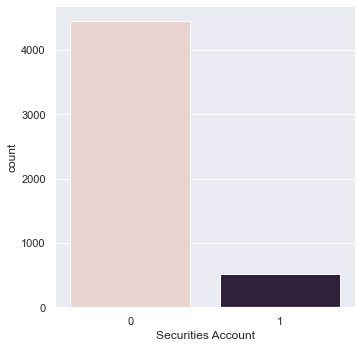

In [98]:
sns.set({'figure.figsize': (10,5)})
sns.catplot(x="Securities Account", kind="count",palette="ch:.01",data=region_df);

In [99]:
region_df.loc[region_df["Securities Account"]==1]

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4   1.60          1         0   
1      45          19      34       3   1.50          1         0   
12     48          23     114       2   3.80          3         0   
14     67          41     112       1   2.00          1         0   
19     55          28      21       1   0.50          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4912   51          26      28       1   1.30          2        94   
4917   36          10      33       4   1.20          2        82   
4956   39          13      59       4   0.20          3         0   
4959   51          27      55       1   1.60          2       197   
4971   58          28      73       1   1.40          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
12                0                   1           0       0           0  
14                0                   1           0       0           0  
19                0                   1           0       0           1  
...             ...                 ...         ...     ...         ...  
4912              0                   1           0       1           0  
4917              0                   1           0       1           0  
4956              0                   1           0       0           1  
4959              0                   1           0       1           0  
4971              0                   1           0       0           0  

[517 rows x 12 columns]

In [100]:
region_df.loc[(region_df["Securities Account"]==1) & (region_df['Personal Loan']==1)].count()

Age                   60
Experience            60
Income                60
Family                60
CCAvg                 60
Education             60
Mortgage              60
Personal Loan         60
Securities Account    60
CD Account            60
Online                60
CreditCard            60
dtype: int64

### Note for Securities Account:
There are total 517 customers have security accounts.
Only 60 people who have taken personal loan have securities account with the bank.

### 9. CD Account

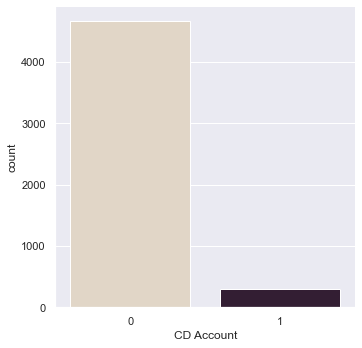

In [101]:
sns.set({'figure.figsize': (10,5)})
sns.catplot(x="CD Account", kind="count",palette="ch:.25",data=region_df);

In [102]:
region_df.loc[region_df["CD Account"]==1].count()

Age                   302
Experience            302
Income                302
Family                302
CCAvg                 302
Education             302
Mortgage              302
Personal Loan         302
Securities Account    302
CD Account            302
Online                302
CreditCard            302
dtype: int64

In [103]:
region_df.loc[(region_df["CD Account"]==1) & (region_df['Personal Loan']==1)].count()

Age                   140
Experience            140
Income                140
Family                140
CCAvg                 140
Education             140
Mortgage              140
Personal Loan         140
Securities Account    140
CD Account            140
Online                140
CreditCard            140
dtype: int64

In [104]:
region_df.loc[(bank_df["CD Account"]==1) & (region_df['Personal Loan']==1) & (region_df["Securities Account"]==1)].count()

Age                   51
Experience            51
Income                51
Family                51
CCAvg                 51
Education             51
Mortgage              51
Personal Loan         51
Securities Account    51
CD Account            51
Online                51
CreditCard            51
dtype: int64

### Note for CD Accounts
- There are 302 people have CD in the Thera Bank.
- There are 140 who have taken personal loan with this bank have CD account with this bank.
- There are only 51 people who have taken personal loan witht his bank have CD and Securities Accounts witht this bank

### 10. Online

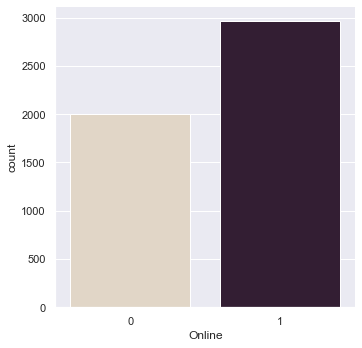

In [105]:
sns.set({'figure.figsize': (10,5)})
sns.catplot(x="Online", kind="count",palette="ch:.25",data=region_df);

In [106]:
region_df.loc[bank_df["Online"]==1].count()

Age                   2964
Experience            2964
Income                2964
Family                2964
CCAvg                 2964
Education             2964
Mortgage              2964
Personal Loan         2964
Securities Account    2964
CD Account            2964
Online                2964
CreditCard            2964
dtype: int64

In [107]:
region_df.loc[(region_df["Online"]==1) & (region_df['Personal Loan']==1)].count()

Age                   291
Experience            291
Income                291
Family                291
CCAvg                 291
Education             291
Mortgage              291
Personal Loan         291
Securities Account    291
CD Account            291
Online                291
CreditCard            291
dtype: int64

### Notes on Online 
- There are 2964 customers who does online/internet banking.
- There are 291 curstomes who does internet banking have personal loans.

### 11. Credicard

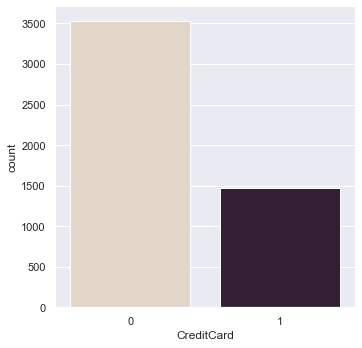

In [108]:
sns.set({'figure.figsize': (10,5)})
sns.catplot(x="CreditCard", kind="count", palette="ch:.24" ,data=bank_df);

In [109]:
region_df.loc[bank_df["CreditCard"]==1].count()

Age                   1458
Experience            1458
Income                1458
Family                1458
CCAvg                 1458
Education             1458
Mortgage              1458
Personal Loan         1458
Securities Account    1458
CD Account            1458
Online                1458
CreditCard            1458
dtype: int64

In [110]:
region_df.loc[(bank_df["CreditCard"]==1) & (region_df['Personal Loan']==1)].count()

Age                   142
Experience            142
Income                142
Family                142
CCAvg                 142
Education             142
Mortgage              142
Personal Loan         142
Securities Account    142
CD Account            142
Online                142
CreditCard            142
dtype: int64

### Notes on CreditCard
- There are 1458 customers who are using Therabank creditcards.
- 142 Customer who are using creditcard have the personal loans.

### Bivariate Analysis

- In this case-study, we are going to apply Logistic Regression.
- But even before we apply, let's have a look at the data to see how each attribute is different when loan status is yes or not.
- To check it, we ll use crosstabs.

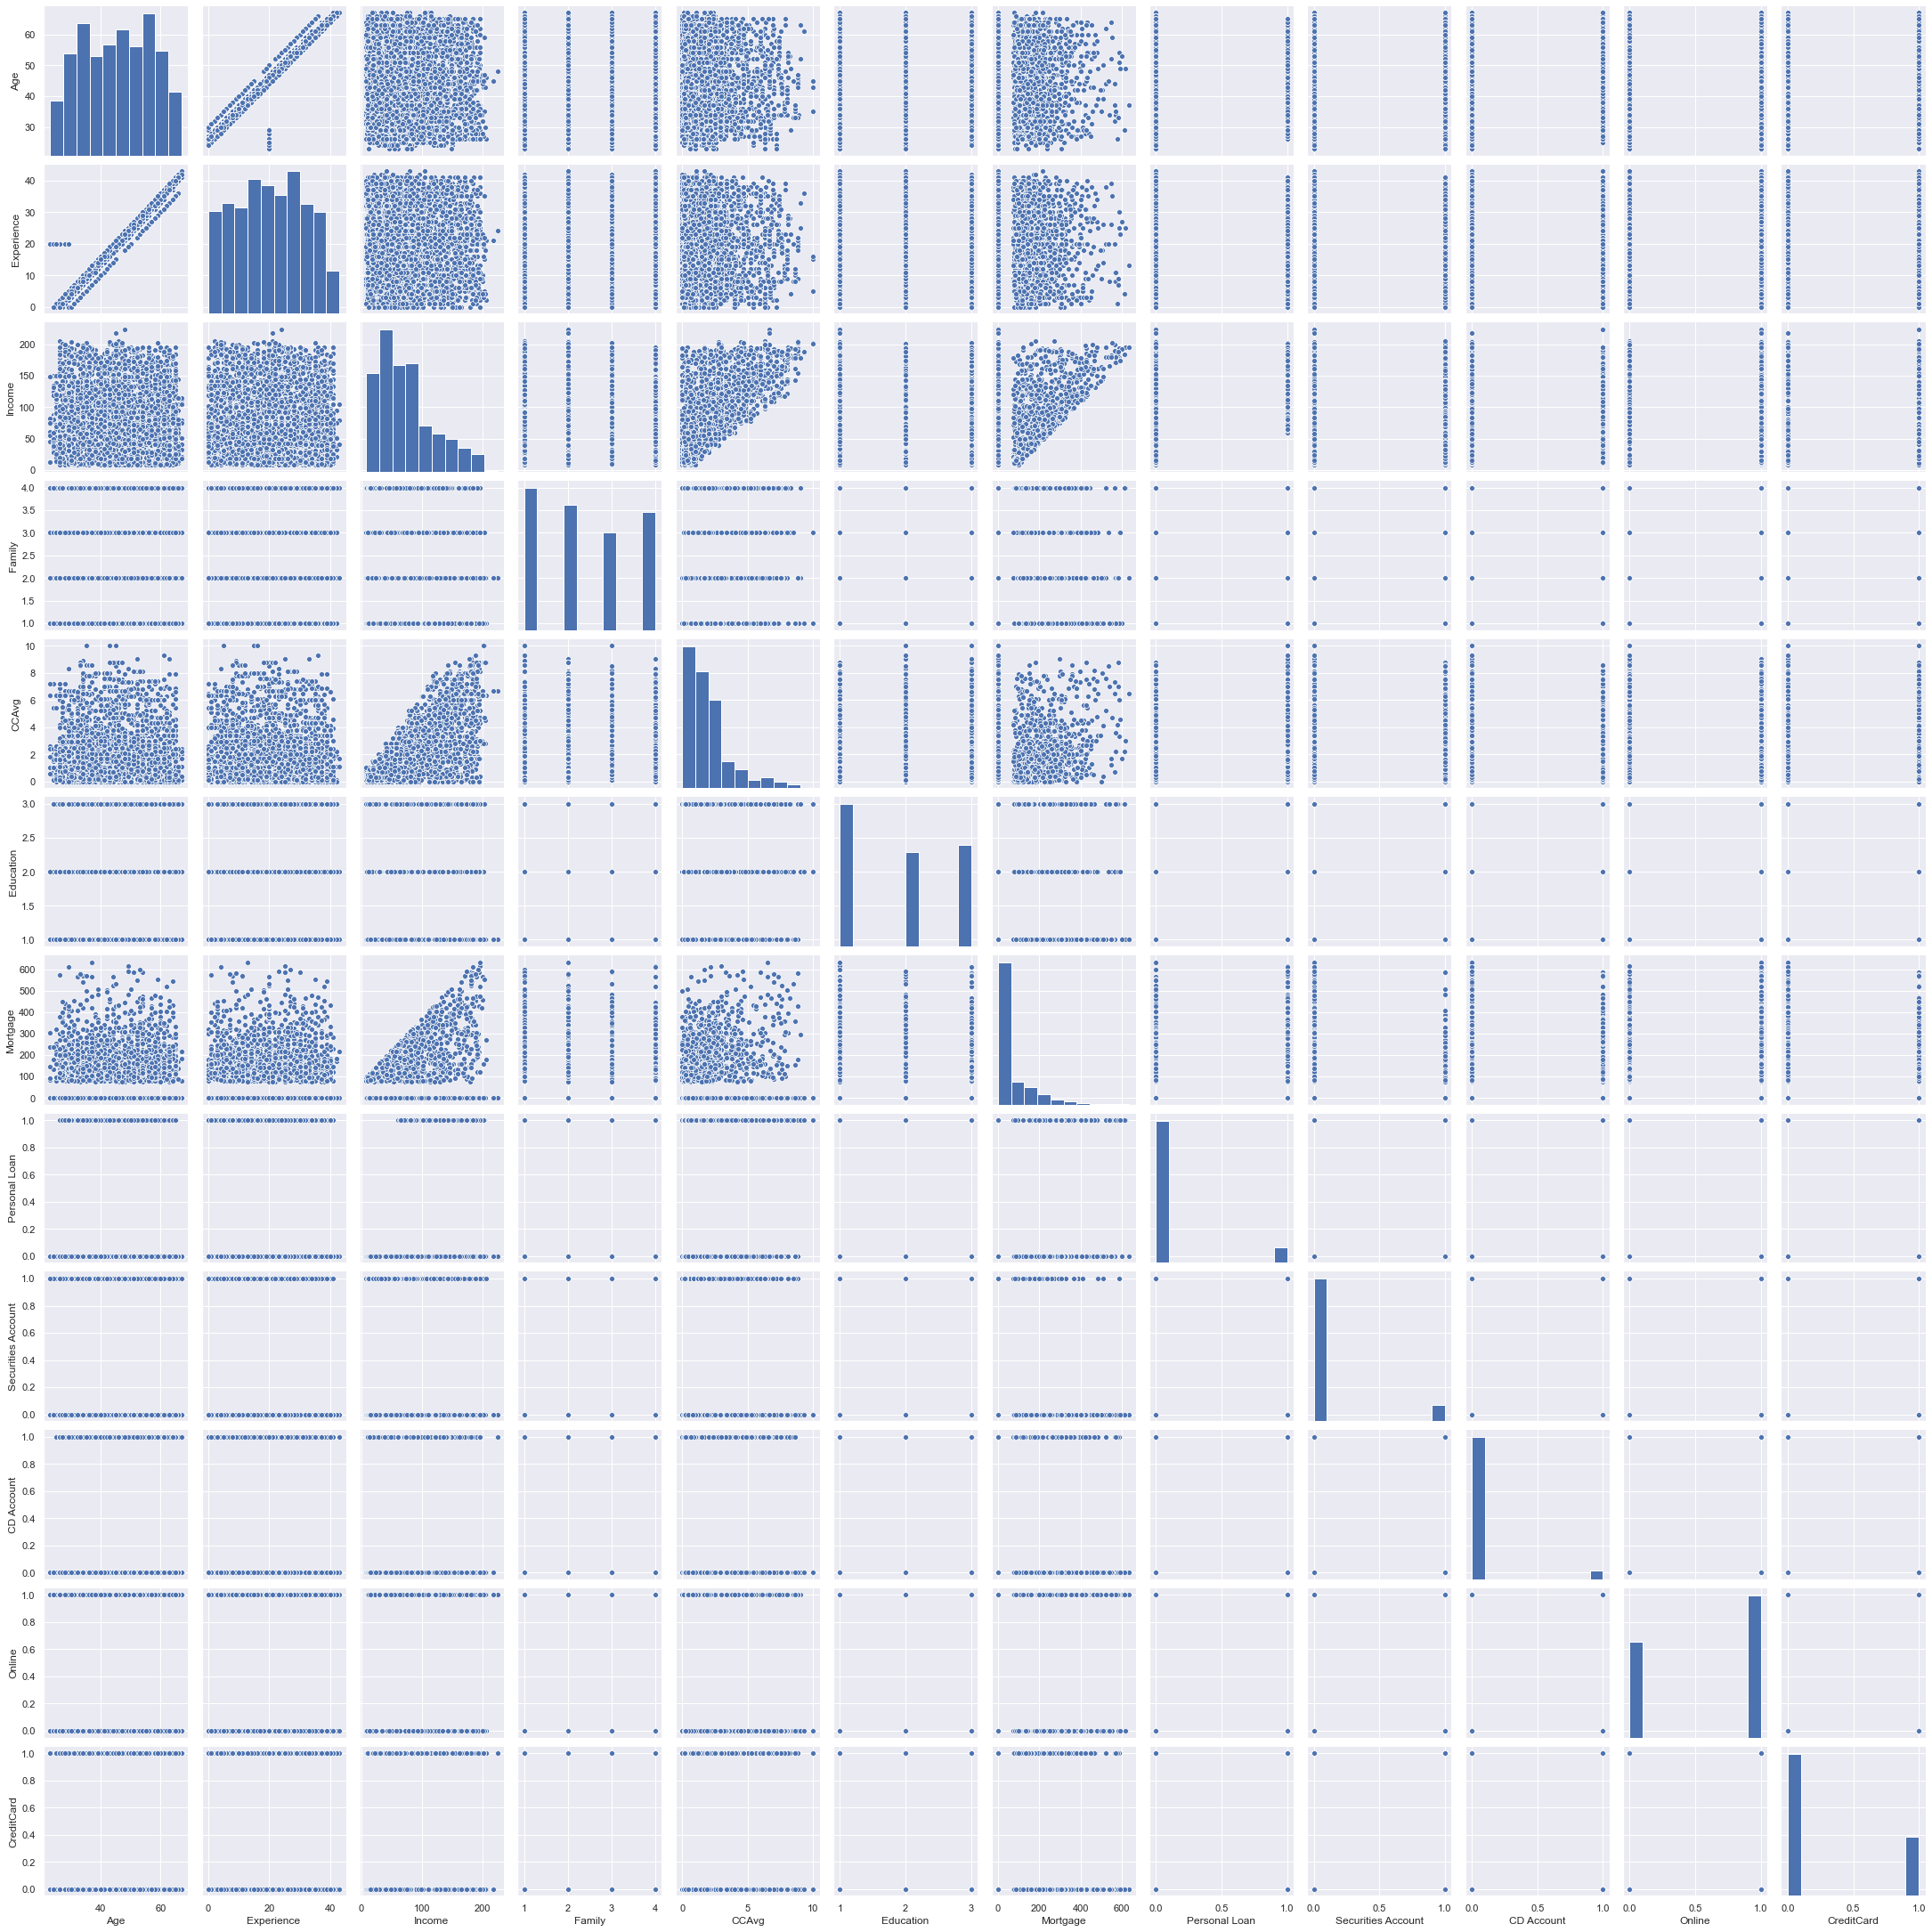

In [111]:
sns.pairplot(region_df);

In [112]:
region_df.groupby(["Personal Loan"]).mean()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
Personal Loan                                                                 
0             45.38       20.39   66.28    2.37   1.73       1.84     51.99   
1             45.11       19.88  144.89    2.61   3.90       2.23    100.68   

               Securities Account  CD Account  Online  CreditCard  
Personal Loan                                                      
0                            0.10        0.04    0.60        0.29  
1                            0.13        0.29    0.61        0.30

In [113]:
region_df.groupby(["Personal Loan"]).median()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
Personal Loan                                                                
0               45          20      59       2   1.50          2         0   
1               45          20     143       3   3.80          2         0   

               Securities Account  CD Account  Online  CreditCard  
Personal Loan                                                      
0                               0           0       1           0  
1                               0           0       1           0

In [114]:
pd.crosstab(region_df['Family'],region_df['Personal Loan'],normalize='columns')

Personal Loan    0    1
Family                 
1             0.30 0.22
2             0.26 0.22
3             0.19 0.28
4             0.24 0.28

In [115]:
pd.crosstab(region_df['Education'],region_df['Personal Loan'],normalize='columns')

Personal Loan    0    1
Education              
1             0.44 0.19
2             0.27 0.38
3             0.29 0.43

#### Observationf on Education, as higher the education people tend to select personal loan

In [116]:
pd.crosstab(region_df['Securities Account'],region_df['Personal Loan'],normalize='columns')

Personal Loan         0    1
Securities Account          
0                  0.90 0.87
1                  0.10 0.13

In [117]:
pd.crosstab(region_df['CD Account'],region_df['Personal Loan'],normalize='columns')

Personal Loan    0    1
CD Account             
0             0.96 0.71
1             0.04 0.29

#### Observation on CD Account , people who has CD account tends to get personal loan

In [118]:
pd.crosstab(region_df['Online'],region_df['Personal Loan'],normalize='columns')

Personal Loan    0    1
Online                 
0             0.40 0.39
1             0.60 0.61

In [119]:
pd.crosstab(region_df['CreditCard'],region_df['Personal Loan'],normalize='columns')

Personal Loan    0    1
CreditCard             
0             0.71 0.70
1             0.29 0.30

#### Observation on CreditCard, CreditCard parameter is not much helpful in identifying the customer willingness to take loan or not

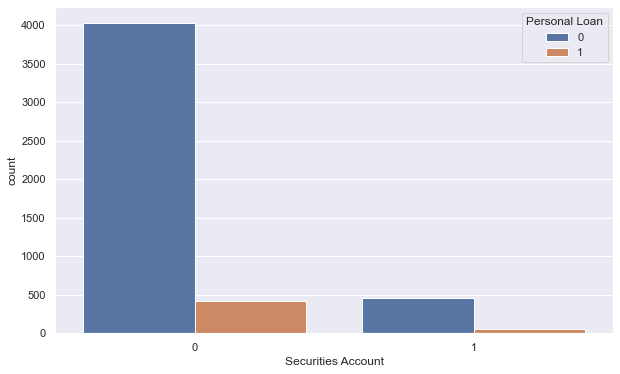

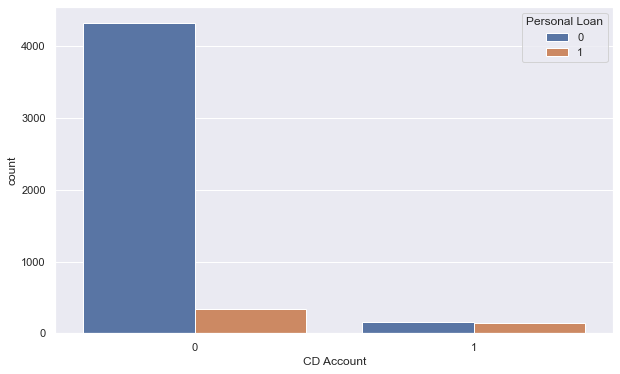

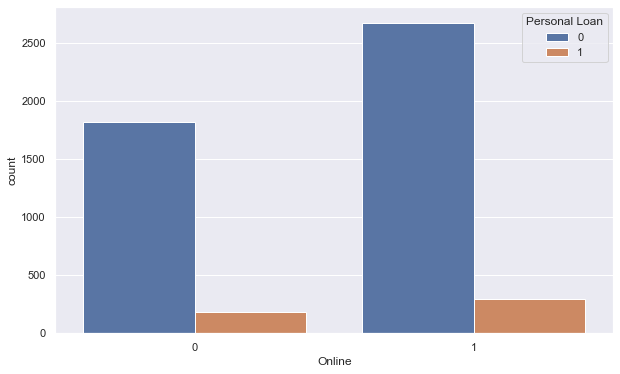

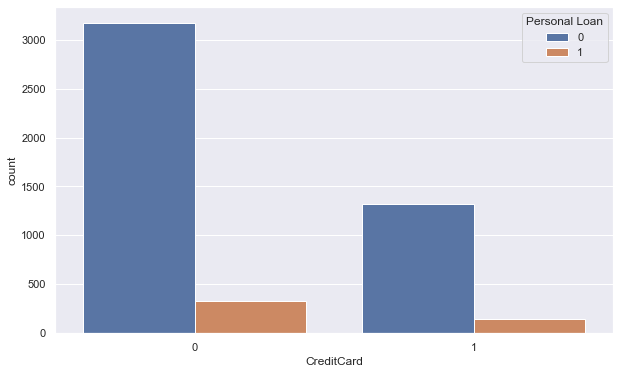

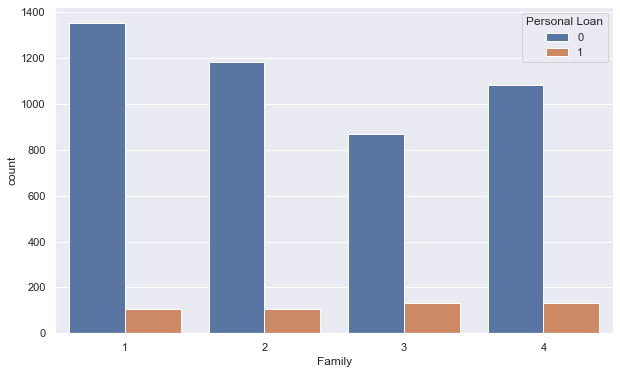

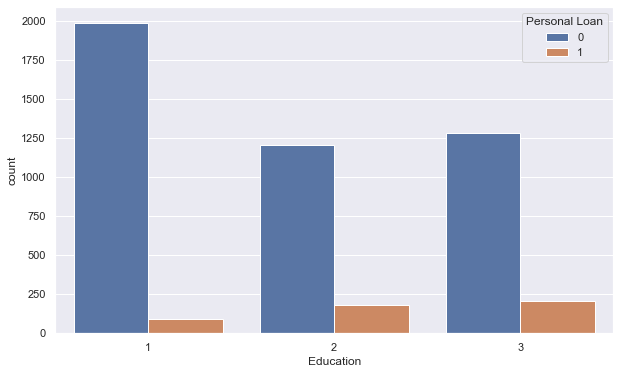

In [120]:
for i in ['Securities Account','CD Account','Online','CreditCard','Family','Education']:
    sns.set({'figure.figsize': (10,6)})
    sns.countplot(region_df[i],hue=region_df['Personal Loan'])
    plt.show()

In [121]:
region_df.corr().T

Age  Experience  Income  Family  CCAvg  Education  \
Age                 1.00        0.98   -0.06   -0.05  -0.05       0.04   
Experience          0.98        1.00   -0.05   -0.05  -0.05       0.02   
Income             -0.06       -0.05    1.00   -0.16   0.65      -0.19   
Family             -0.05       -0.05   -0.16    1.00  -0.11       0.07   
CCAvg              -0.05       -0.05    0.65   -0.11   1.00      -0.14   
Education           0.04        0.02   -0.19    0.07  -0.14       1.00   
Mortgage           -0.01       -0.01    0.21   -0.02   0.11      -0.03   
Personal Loan      -0.01       -0.01    0.50    0.06   0.37       0.14   
Securities Account -0.00       -0.00   -0.00    0.02   0.01      -0.01   
CD Account          0.01        0.01    0.17    0.01   0.14       0.01   
Online              0.01        0.01    0.01    0.01  -0.00      -0.01   
CreditCard          0.01        0.01   -0.00    0.01  -0.01      -0.01   

                    Mortgage  Personal Loan  Securities Account  CD Account  \
Age                    -0.01          -0.01               -0.00        0.01   
Experience             -0.01          -0.01               -0.00        0.01   
Income                  0.21           0.50               -0.00        0.17   
Family                 -0.02           0.06                0.02        0.01   
CCAvg                   0.11           0.37                0.01        0.14   
Education              -0.03           0.14               -0.01        0.01   
Mortgage                1.00           0.14               -0.00        0.09   
Personal Loan           0.14           1.00                0.02        0.32   
Securities Account     -0.00           0.02                1.00        0.32   
CD Account              0.09           0.32                0.32        1.00   
Online                 -0.00           0.01                0.01        0.18   
CreditCard             -0.01           0.00               -0.01        0.28   

                    Online  CreditCard  
Age                   0.01        0.01  
Experience            0.01        0.01  
Income                0.01       -0.00  
Family                0.01        0.01  
CCAvg                -0.00       -0.01  
Education            -0.01       -0.01  
Mortgage             -0.00       -0.01  
Personal Loan         0.01        0.00  
Securities Account    0.01       -0.01  
CD Account            0.18        0.28  
Online                1.00        0.01  
CreditCard            0.01        1.00

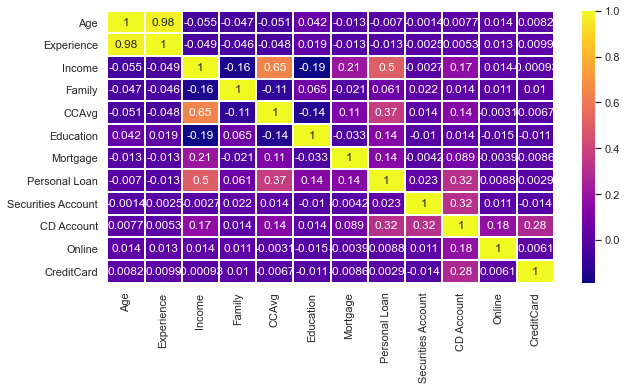

In [122]:
sns.set({'figure.figsize': (10,5)})
sns.heatmap(region_df.corr(),linewidths=1,cmap='plasma',annot=True);

## Observationf from HeatMap

- (1). Experience and Age are highly correlated, so one can be dropped. 
- (2). Income and CCAvg have somewhat stronger positive correlation.
- (3). Income, CCAvg, and CD Account is somewaht correlated with Personal Loan

### Based on above observation lets create categorical columns

In [123]:
region_df.drop(columns=['Experience'],inplace=True)

In [124]:
region_df.shape

(4966, 11)

In [125]:
#Convert X & Y variable to a categorical variable wherever relevant
region_df['Personal Loan'] = region_df['Personal Loan'].astype('category')
region_df['Securities Account'] = region_df['Securities Account'].astype('category')
region_df['CD Account'] = region_df['CD Account'].astype('category')
region_df['Online'] = region_df['Online'].astype('category')
region_df['CreditCard'] = region_df['CreditCard'].astype('category')
region_df['Education'] = region_df['Education'].astype('category')
region_df['Family'] = region_df['Family'].astype('category')

In [126]:
#bins = [22, 35, 45, 56, 68]
#cats = ['22-34', '35-44', '45-55', '56-68']
#region_df["age_cat"]= pd.cut(region_df.Age, bins, labels=cats)

#region_df["age_cat"]
#pd.crosstab(region_df['age_cat'],region_df['Personal Loan'],margins=True)
#- Observation:- The age doesn't play much role in selecting or not selecting roles.
#region_df.drop(columns=['Age'],inplace=True)


### Outlier treatement for Mortgage, there are roughly 291 datapoints are outliers in the datase

In [127]:
# using stats.zscore, result could be negative hence using absolute value

from scipy import stats
region_df['zscore_Mortgage']=np.abs(stats.zscore(region_df.Mortgage))

region_df.shape


(4966, 12)

In [128]:
## Trying to drop ouliers who have zscore>=3

In [129]:
region_df=region_df[region_df.zscore_Mortgage <3]

In [130]:
region_df.drop('zscore_Mortgage',axis=1,inplace=True)

In [131]:
region_df.shape

(4861, 11)

In [132]:
region_df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

## Get the DataModel ready

### Spliting the data
### 70% of data for training and 30% for testing.

In [133]:
from sklearn.model_selection import train_test_split

X = region_df.drop('Personal Loan',axis=1)    
Y = region_df['Personal Loan']



In [134]:
X.shape

(4861, 10)

In [135]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [136]:
X.shape

(4861, 13)

In [137]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4861 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4861 non-null   int64  
 1   Income                4861 non-null   int64  
 2   CCAvg                 4861 non-null   float64
 3   Mortgage              4861 non-null   int64  
 4   Family_2              4861 non-null   uint8  
 5   Family_3              4861 non-null   uint8  
 6   Family_4              4861 non-null   uint8  
 7   Education_2           4861 non-null   uint8  
 8   Education_3           4861 non-null   uint8  
 9   Securities Account_1  4861 non-null   uint8  
 10  CD Account_1          4861 non-null   uint8  
 11  Online_1              4861 non-null   uint8  
 12  CreditCard_1          4861 non-null   uint8  
dtypes: float64(1), int64(3), uint8(9)
memory usage: 232.6 KB


In [138]:
#'stratify' argument maintains the distribution of classes in train and test sets same as original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42,stratify=Y)
# 1 is just any random seed number

X_train.head()

Age  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  Education_2  \
3921   30      48   1.20         0         0         0         0            0   
2659   60      43   0.90       175         0         1         0            0   
3822   63     178   9.00         0         0         0         1            0   
727    62      18   1.30         0         0         1         0            1   
3298   56      11   0.30        89         1         0         0            0   

      Education_3  Securities Account_1  CD Account_1  Online_1  CreditCard_1  
3921            0                     0             0         1             0  
2659            1                     0             0         0             0  
3822            1                     0             0         0             0  
727             0                     0             0         1             0  
3298            0                     0             0         0             0

In [139]:
y_train.value_counts()

0    3101
1     301
Name: Personal Loan, dtype: int64

In [140]:
y_test.value_counts()

0    1330
1     129
Name: Personal Loan, dtype: int64

In [141]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False,solver = 'liblinear')
logreg.fit(X_train, y_train)  

LogisticRegression(fit_intercept=False, random_state=4294967295,
                   solver='liblinear')

In [142]:
## Predicting the target variable on test data
y_predict = logreg.predict(X_test)   

In [143]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

Age  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  Education_2  \
1121   30      49   0.70       196         0         1         0            1   
4452   59      53   2.30       174         0         0         1            0   
4302   52      85   3.40         0         0         1         0            0   
3496   37      49   2.00       192         0         0         1            0   
1074   39      75   3.00         0         0         1         0            0   

      Education_3  Securities Account_1  CD Account_1  Online_1  CreditCard_1  \
1121            0                     0             0         0             1   
4452            1                     0             0         1             0   
4302            1                     0             0         0             0   
3496            1                     0             0         0             0   
1074            0                     0             0         0             1   

     Observed Loan Status  Predicted Loan Status  
1121                    0                      0  
4452                    0                      0  
4302                    1                      0  
3496                    0                      0  
1074                    0                      0

### Build a confusion matrix and display the same using heatmap plot

In [144]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["not_take_loan","take_loan"] , yticklabels = ["not_take_loan","take_loan"] )
    plt.ylabel('Observed Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [145]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1330
           1       0.70      0.44      0.54       129

    accuracy                           0.93      1459
   macro avg       0.83      0.71      0.75      1459
weighted avg       0.93      0.93      0.93      1459



Trainig accuracy 0.9294532627865961

Testing accuracy 0.934201507882111

Confusion Matrix


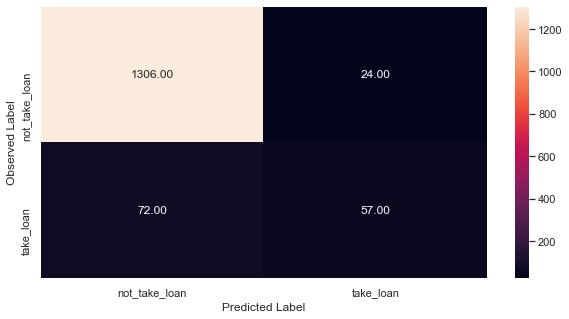

None

Recall: 0.4418604651162791

Precision: 0.7037037037037037

F1 Score: 0.5428571428571429

Roc Auc Score: 0.7119076761671621


In [146]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

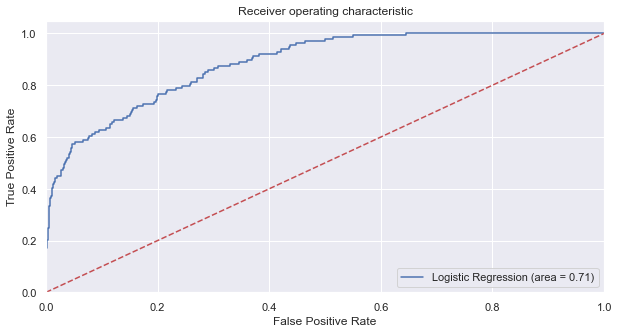

In [147]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Displaying Coefficient column name wise 

In [148]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

Col  Coeff
10          CD Account_1   3.72
12          CreditCard_1   1.41
8            Education_3   1.31
9   Securities Account_1   1.27
11              Online_1   1.21
4               Family_2   1.19
7            Education_2   1.18
6               Family_4   0.37
0                    Age   0.11
2                  CCAvg   0.05
1                 Income   0.03
5               Family_3   0.01
3               Mortgage   0.00

In [149]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = logreg.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = logreg.predict_proba(X_test)[:,1]

z['Predicted'] = logreg.predict(X_test)                               # Predicting target variable using sklearn Logistic regression

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

In [150]:
z.head(5)

Actual  Probaility that output is 0  Probaility that output is 1  Predicted
0      0                         0.91                         0.09          0
1      0                         0.99                         0.01          0
2      1                         0.86                         0.14          0
3      0                         0.86                         0.14          0
4      0                         0.97                         0.03          0

## Showing all the rows where the predicted class is not equal to the observed class

In [151]:
z[z.apply(lambda x: x['Actual'] != x['Predicted'], axis = 1)]

Actual  Probaility that output is 0  Probaility that output is 1  \
2         1                         0.86                         0.14   
22        1                         0.77                         0.23   
41        1                         0.75                         0.25   
43        1                         0.63                         0.37   
61        1                         0.87                         0.13   
...     ...                          ...                          ...   
1391      0                         0.49                         0.51   
1397      1                         0.65                         0.35   
1403      1                         0.98                         0.02   
1429      0                         0.25                         0.75   
1431      0                         0.32                         0.68   

      Predicted  
2             0  
22            0  
41            0  
43            0  
61            0  
...         ...  
1391          1  
1397          0  
1403          0  
1429          1  
1431          1  

[96 rows x 4 columns]

- There are total 96 datapoints doesnt match with its actual observed value

### Conclusion


### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted consumer will take personal loan and the customer did take the personal loan.Total correct prediction= 57.

*False Positive (observed=0,predicted=1):*

Predicted cosumer will take personal loan  and the customer did not take the personal loan. occurance of FP= 24 (Type 1 error)

*True Negative (observed=0,predicted=0):* Total correct prediction =1306

Predicted consumer will not take the loan and the customer did not take the personal loan.

*False Negative (observed=1,predicted=0):* occurance 72 (Type 2 error )

Predicted customer will not take the loan and the customer did take the loan. Occurance of FN=72

### Important Features¶
Bank's existing CD Account_1,existing CreditCard_1, Advance/Professional Education_1, Existing Securities Account_1 and internet banking Online_1 seems to be top 5 features which influence the model's output. Based on the coefficients value.
### `Important Metric`

Here more focus towards should be towards **precision** because our target variable is identify customer who are potential to 'Personal Loan' ,  
i.e As company is spending money on compaign to avoid their money getting wasted , we need to reduce the occurance identifying customer
who will take loan but eventually they dont,because instead of focusing on these group of customer , company could have focus more on other potential coustomers
who would take loan.

